# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_data = pd.merge(mouse_metadata,study_results,on="Mouse ID")
# Display the data table for preview
mouse_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_mice = len(mouse_study_data["Mouse ID"].unique())
number_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRows = mouse_study_data[mouse_study_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicateRows['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_data.loc[mouse_study_data["Mouse ID"]=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mouse_study_data.drop(labels=[908,909,910,911,912,913,914,915,916,917,918,919,920],axis=0)
clean_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_data["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped_data = clean_mouse_data.groupby(['Drug Regimen'])
drug_list = list(grouped_data['Drug Regimen'].unique().explode())
mean = list(grouped_data['Tumor Volume (mm3)'].mean(numeric_only = True))
median = list(grouped_data['Tumor Volume (mm3)'].median(numeric_only = True))
variance = list(grouped_data['Tumor Volume (mm3)'].var(numeric_only = True))
std_dev = list(grouped_data['Tumor Volume (mm3)'].std(numeric_only = True))
SEM = list(grouped_data['Tumor Volume (mm3)'].sem(numeric_only = True))
tumor_volume = pd.DataFrame({'Drug Regimen':drug_list,'Mean':mean,'Median':median,'Variance':variance,'Std Dev':std_dev,'SEM':SEM})
tumor_volume.set_index("Drug Regimen")

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

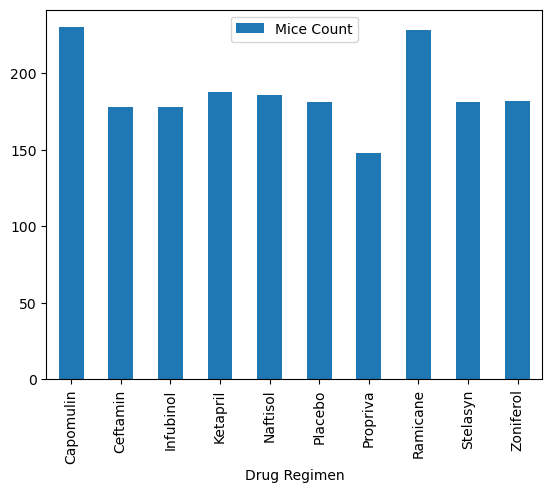

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

bar_plot = pd.DataFrame({'Drug Regimen':list(grouped_data['Drug Regimen'].unique().explode()),
                       'Mice Count':list(grouped_data['Mouse ID'].count())})
bar_plot.plot.bar(x='Drug Regimen',y='Mice Count')


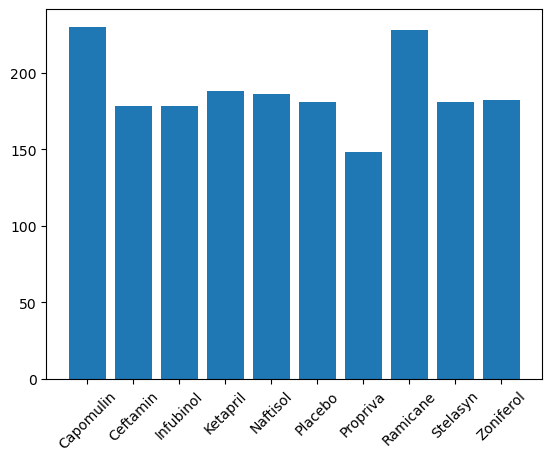

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
fig, ax = plt.subplots()
ax.bar(drug_list,list(grouped_data['Mouse ID'].count()))
plt.xticks(rotation = 45)
plt.show()

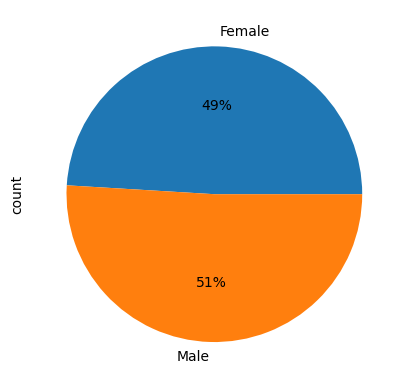

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_plot = clean_mouse_data.groupby("Sex")
x = pie_plot['Sex'].describe()['count']
plot = x.plot.pie(x='Sex',y='count',autopct='%1.0f%%')

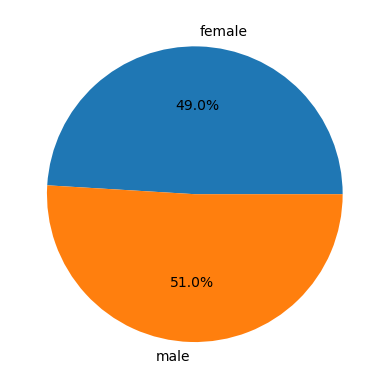

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig, ax = plt.subplots()
ax.pie(list(pie_plot['Sex'].describe()['count']),labels=['female','male'],autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
y = clean_mouse_data.groupby('Mouse ID')
max_timepoint = y['Timepoint'].describe()['max']
max_timepoint_df = max_timepoint.reset_index()
max_timepoint_df = max_timepoint_df.rename(columns={"max":"Timepoint"})
max_timepoint_df
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
latest_tumor_df = pd.merge(max_timepoint_df,clean_mouse_data,on=["Mouse ID","Timepoint"])
latest_tumor_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45.0,Infubinol,Female,20,23,67.973419,2
1,a251,45.0,Infubinol,Female,21,25,65.525743,1
2,a262,45.0,Placebo,Female,17,29,70.717621,4
3,a275,45.0,Ceftamin,Female,20,28,62.999356,3
4,a366,30.0,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10.0,Propriva,Female,12,26,48.710661,0
244,z578,45.0,Ramicane,Male,11,16,30.638696,0
245,z581,45.0,Infubinol,Female,24,25,62.754451,3
246,z795,45.0,Naftisol,Female,13,29,65.741070,3


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = drug_list
treatments

# Create empty list to fill with tumor vol data (for plotting)
treatment_lists = {}
for treatment in treatments:
    treatment_lists[treatment] = latest_tumor_df.loc[latest_tumor_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
def IQR(drug):
    data = treatment_lists[drug]
    IQR = data.quantile(0.75) - data.quantile(0.25)
    outlierCount = 0
    for datum in data:
        if datum > data.quantile(0.75)+1.5*IQR or datum < data.quantile(0.25)-1.5*IQR:
            outlierCount += 1
    print(f"The IQR for {drug} is {IQR}.")
    print(f"{drug} has {outlierCount} outliers.")
    return

for drug in treatments:
    IQR(drug)

The IQR for Capomulin is 7.781863460000004.
Capomulin has 0 outliers.
The IQR for Ceftamin is 15.577752179999997.
Ceftamin has 0 outliers.
The IQR for Infubinol is 11.477135160000003.
Infubinol has 1 outliers.
The IQR for Ketapril is 13.152155339999993.
Ketapril has 0 outliers.
The IQR for Naftisol is 17.484110670000007.
Naftisol has 0 outliers.
The IQR for Placebo is 15.191386480000006.
Placebo has 0 outliers.
The IQR for Propriva is 13.569628922499994.
Propriva has 0 outliers.
The IQR for Ramicane is 9.098536719999998.
Ramicane has 0 outliers.
The IQR for Stelasyn is 16.62734878500001.
Stelasyn has 0 outliers.
The IQR for Zoniferol is 16.805853529999993.
Zoniferol has 0 outliers.


{'whiskers': [<matplotlib.lines.Line2D at 0x19a07288820>,
 'caps': [<matplotlib.lines.Line2D at 0x19a072883a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19a072886d0>,
 'medians': [<matplotlib.lines.Line2D at 0x19a07289570>,
 'fliers': [<matplotlib.lines.Line2D at 0x19a07289870>,
 'means': []}

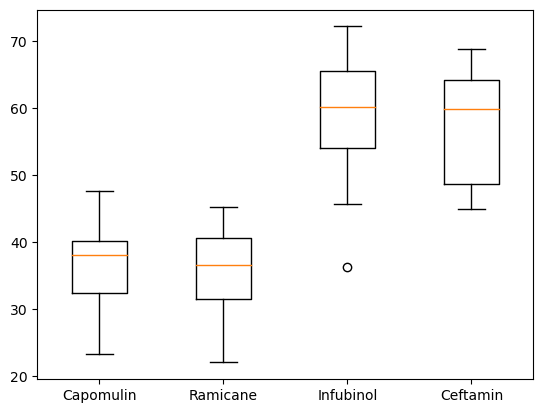

In [22]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot([treatment_lists['Capomulin'],treatment_lists['Ramicane'],treatment_lists['Infubinol'],treatment_lists['Ceftamin']],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'])



## Line and Scatter Plots

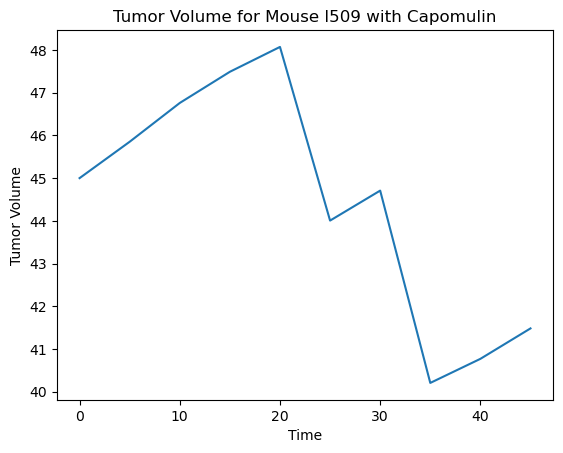

In [43]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mousel509 = clean_mouse_data.loc[clean_mouse_data["Mouse ID"] == "l509"]
mousel509 = mousel509.loc[mousel509["Drug Regimen"] == 'Capomulin']
fig, ax = plt.subplots()
ax.plot(mousel509["Timepoint"], mousel509["Tumor Volume (mm3)"])
ax.set_title("Tumor Volume for Mouse l509 with Capomulin")
ax.set_xlabel("Time")
ax.set_ylabel("Tumor Volume")
plt.show()

C:\Users\smoot\AppData\Local\Temp\ipykernel_28296\3806993086.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  averagedData = capomulinData.groupby(['Mouse ID']).mean()


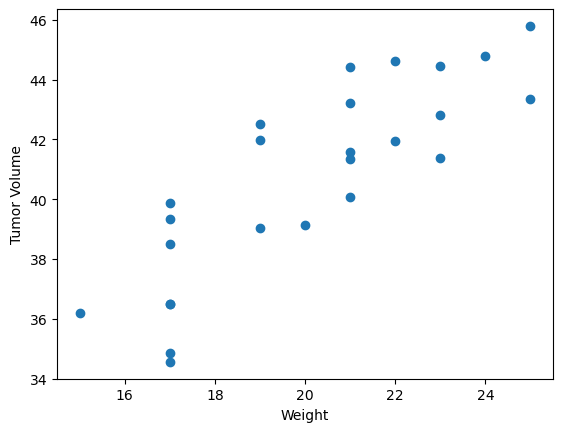

In [50]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulinData = clean_mouse_data.loc[clean_mouse_data["Drug Regimen"] == 'Capomulin']
averagedData = capomulinData.groupby(['Mouse ID']).mean()
fig, ax = plt.subplots()
ax.scatter(averagedData["Weight (g)"], averagedData["Tumor Volume (mm3)"])
ax.set_xlabel("Weight")
ax.set_ylabel("Tumor Volume")
plt.show()

## Correlation and Regression

The correlation of weight to tumor voulume is 0.8419363424694721


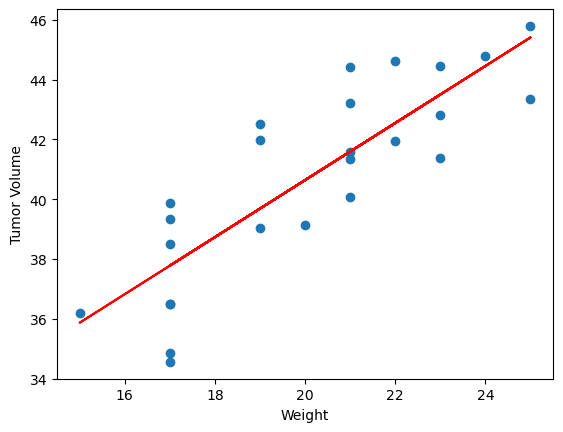

In [55]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = averagedData["Weight (g)"]
y_values = averagedData["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
print(f"The correlation of weight to tumor voulume is {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.show()